<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Project-3/Project3_Moteur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

In [ ]:
flat = ('https://raw.githubusercontent.com/james-monahan/Project3-backup/main/df_flat_review.csv')
ml = ('https://raw.githubusercontent.com/james-monahan/Project3-backup/main/df_no_dir.csv')

df_flat_review = pd.read_csv(flat)
df_no_dir = pd.read_csv(ml)
# display(df_flat_review_bu.head(1))
# df_no_dir_bu.shape

#Netfloux, Creuse ton film

#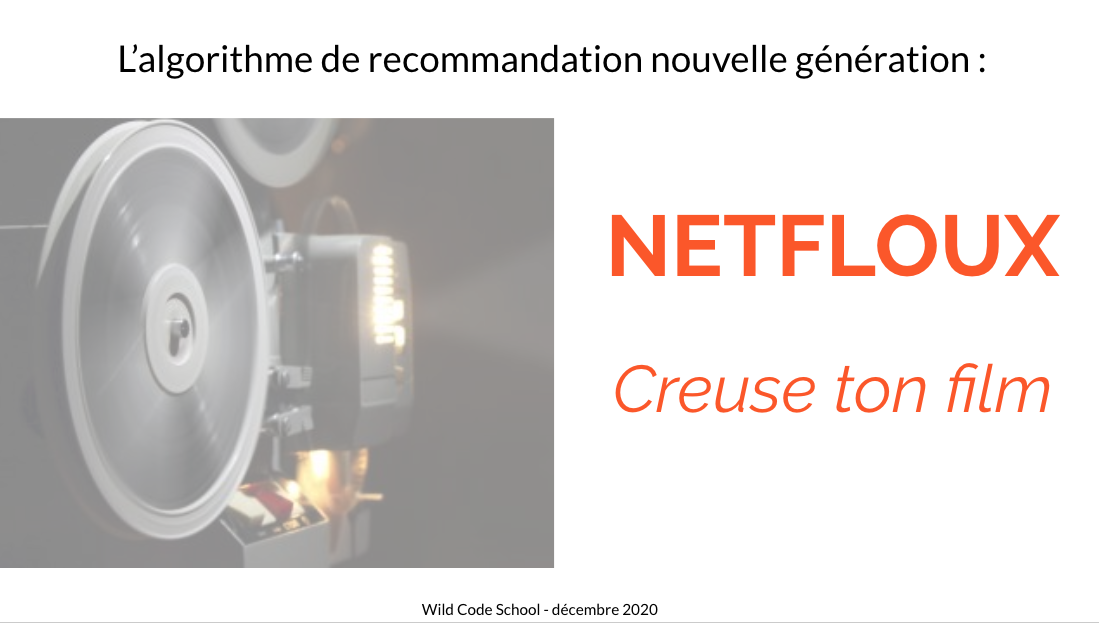

#Qui êtes-vous ?

In [ ]:
#@title Questionaire
Full_Name = "James Monahan" #@param {type:"string"}
Email_Address = "james@james.com" #@param {type:"string"}

Favorite_Genre = "Action" #@param ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama','Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Next_Favorite_Genre = "Adventure" #@param ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama','Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
How_often_watch_movies = "Rarely" #@param ['Every Day', 'Often', 'Sometimes', 'Rarely']

Favorite_Movie = "Way of the Gun" #@param {type:"string"}

Sex = "Male" #@param ['Male', 'Female', 'Prefer Not to Say']
Age = 44 #@param {type:"integer"}
#age used to recomend movies from timeperiod

Consent_Terms_of_Service = True #@param {type:"boolean"}

person = {'Full_Name':[Full_Name], 'Email_Address':[Email_Address],
          'Favorite_Genre':[Favorite_Genre], 'Next_Favorite_Genre':[Next_Favorite_Genre],
          'How_often_watch_movies':[How_often_watch_movies],
          'Favorite_Movie':[Favorite_Movie], 'Sex':[Sex], 'Age':[Age], 
          'Consent':[Consent_Terms_of_Service]}


profile_df = pd.DataFrame.from_dict(person)
# print(profile_df)
# df = pd.DataFrame(person.values(), columns=person.keys())

#  {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
profile_df

,Full_Name,Email_Address,Favorite_Genre,Next_Favorite_Genre,How_often_watch_movies,Favorite_Movie,Sex,Age,Consent
0,James Monahan,james@james.com,Action,Musical,Rarely,Way of the Gun,Male,44,True


#Choisissez un film

In [ ]:
#@title Get Movie

Movie_Name = "Titanic" #@param {type:"string"}

def get_movie_name_idx(movie = Movie_Name):
  movie_index = df_no_dir[df_no_dir.title.str.contains(movie)].index
  print(df_no_dir.loc[movie_index][['title', 'Mean_rating', 'Total_ratings']])
  movie_index = movie_index[0]
  return movie_index

movie_index = get_movie_name_idx(movie = Movie_Name)
#print(movie_index)

                         title  Mean_rating  Total_ratings
1274            Titanic (1997)     3.414286            140
2515  Raise the Titanic (1980)     4.000000              1
2516            Titanic (1953)     3.583333              6


#Voici notre recommandation pour vous :

In [ ]:
#@title Movie Recommendations

Movie_is_correct = True #@param {type:"boolean"}
Number_of_recommendations =  5#@param {type:"number"}
Distance = 2 

num = Number_of_recommendations+1

def find_neighbors(df, neighbors, movie, p):
  samples = df.drop(['movieId', 'title'], axis=1)
  scaler = StandardScaler()
  samples_scale = scaler.fit_transform(samples)
  neigh = NearestNeighbors(n_neighbors=neighbors, p=p)
  neigh.fit(samples_scale)
  movies = neigh.kneighbors(samples_scale[movie_index:movie_index+1, :], return_distance=False)
  
  remove1 = np.array([movies[0][1:]])
  # [print(df.loc[x, ['title', 'Mean_rating', 'Total_ratings']]) for x in remove1]
  [print(df_flat_review.loc[x, ['title', 'director']]) for x in remove1]

# df_flat_review
if Movie_is_correct:
  find_neighbors(df = df_no_dir, neighbors = num, movie = movie_index, p=Distance)
else:
  print('Please Select Your Film')

                                       title      director
1268                Good Will Hunting (1997)  Gus Van Sant
3604                Beautiful Mind, A (2001)    Ron Howard
2124                  American Beauty (1999)    Sam Mendes
882   One Flew Over the Cuckoo's Nest (1975)  Milos Forman
1717               American History X (1998)     Tony Kaye


#Moteur Statistic

In [ ]:
#@title Movie Statistics By Genre

aggs = {'movieId':'count', 'Mean_rating': 'mean', 'Total_ratings':'sum', 
'startYear':'mean', 'runtimeMinutes':'mean', 'director':'nunique',
'IMDBRating':'mean', 'IMBDVotes':'sum', 
'(no genres listed)':['sum', 'mean'], 'Action':['sum', 'mean'], 'Adventure':['sum', 'mean'],
'Animation':['sum', 'mean'], 'Children':['sum', 'mean'], 'Comedy':['sum', 'mean'], 
'Crime':['sum', 'mean'], 'Documentary':['sum', 'mean'], 'Drama':['sum', 'mean'],
'Fantasy':['sum', 'mean'], 'Film-Noir':['sum', 'mean'], 'Horror':['sum', 'mean'], 
'IMAX':['sum', 'mean'], 'Musical':['sum', 'mean'], 'Mystery':['sum', 'mean'],
'Romance':['sum', 'mean'], 'Sci-Fi':['sum', 'mean'], 'Thriller':['sum', 'mean'], 'War':['sum', 'mean'], 'Western':['sum', 'mean']}


by_decade = True #@param {type:"boolean"}
Genre = "Action" #@param ["None", 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama','Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']



def mean_genre(data = df_flat_review, genre = '(no genres listed)', by_decade=by_decade):
  if by_decade:
    data['startYear'] = data['startYear'].apply(lambda x: x//10*10)
    mask = data[genre]==1
    data = data[mask]
    return data.groupby([genre, 'startYear']).agg(aggs)
  else:
    mask = data[genre]==1
    data = data[mask]
    return data.groupby(genre).agg(aggs)

mean_genre(data = df_flat_review, genre = Genre, by_decade=by_decade)

movieId Mean_rating Total_ratings  ...       War Western          
                   count        mean           sum  ...      mean     sum      mean
Action startYear                                    ...                            
1      1900.0          1    3.500000             5  ...  0.000000       0  0.000000
       1910.0          1    3.750000             2  ...  0.000000       0  0.000000
       1920.0          3    4.000000             4  ...  0.000000       0  0.000000
       1930.0          8    3.780000            53  ...  0.250000       1  0.125000
       1940.0          8    3.050781            26  ...  0.375000       3  0.375000
       1950.0         15    3.667526           184  ...  0.266667       1  0.066667
       1960.0         56    3.647562           695  ...  0.214286       6  0.107143
       1970.0        103    3.388651          1149  ...  0.087379       5  0.048544
       1980.0        225    2.992273          4403  ...  0.075556       2  0.008889
       1990.0        390    2.988594         10851  ...  0.051282       7  0.017949
       2000.0        541    3.113793          9401  ...  0.075786       8  0.014787
       2010.0        454    3.039239          3930  ...  0.044053       9  0.019824

[12 rows x 48 columns]